In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D:\Projects\Python_Data_Project\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Akkju\AppData\Local\Temp\ipykernel_12660\804188518.py:5: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\Projects\Python_Data_Project\data_jobs.csv')


In [2]:
def clean_list(skills_list):
    if pd.notna(skills_list):
        return ast.literal_eval(skills_list)
    
df['job_skills'] = df['job_skills'].apply(clean_list)

In [3]:
df_DA_US = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()

In [4]:
df_DA_US =df_DA_US.dropna(subset=['salary_year_avg'])

In [5]:
df_DA_US['salary_year_avg'].sample(10)

658462    106000.0
404445     95000.0
556386     32500.0
36578      93027.0
156226    106479.0
252431    115000.0
541609    245000.0
474641     92500.0
473752     57500.0
647673     90000.0
Name: salary_year_avg, dtype: float64

<Axes: >

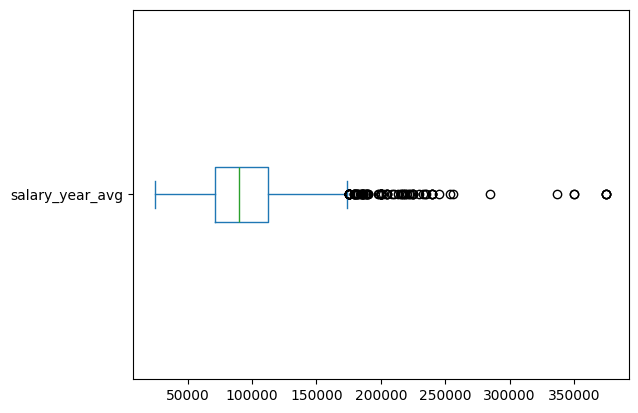

In [6]:
df_DA_US['salary_year_avg'].plot(kind = 'box', vert=False) #Pandas + matplot lib way

{'whiskers': [<matplotlib.lines.Line2D at 0x2a5e242aad0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a5e242ad50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a5e242a990>],
 'medians': [<matplotlib.lines.Line2D at 0x2a5e242afd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a5e242b110>],
 'means': []}

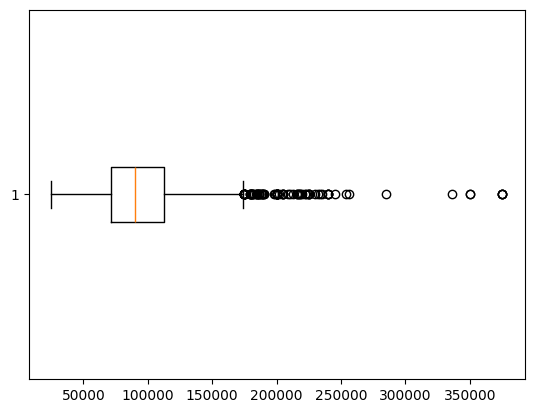

In [7]:
plt.boxplot(df_DA_US['salary_year_avg'],vert=False) #Matplotlib way

In [8]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles))& (df['job_country']=='United States')].copy()
df_US = df_US.dropna(subset='salary_year_avg')

In [9]:
job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

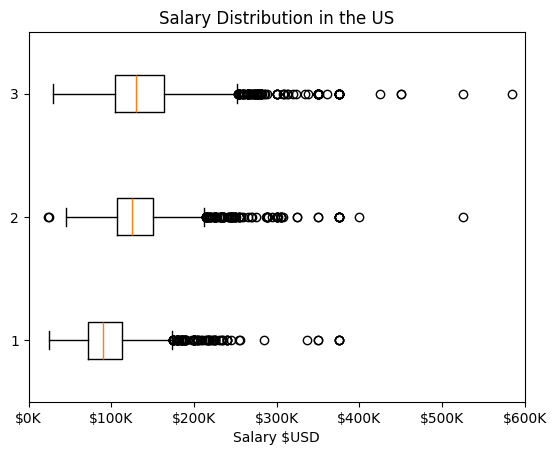

In [18]:
plt.boxplot(job_list,label='job_titles', vert=False)
plt.title('Salary Distribution in the US')
plt.xlabel('Salary $USD')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()